# Lead Scoring Case Study
_by Abhishek Rathore, Abhisek Kundu, Abhradeep Chandra Paul_

X Education aims to improve its 30% lead conversion rate by identifying 'Hot Leads'. These high-potential leads enable the sales team to focus on the most promising prospects, thus improving efficiency. Provided with a dataset of 9000 past leads, including attributes like Lead Source, Total Time Spent on Website, and Total Visits, you need to build a predictive model to assign lead scores. The goal is to elevate the lead conversion rate to around 80%. Managing categorical variables with 'Select' values is crucial, as they represent null entries and can impact the model's performance if not handled properly.

Steps to follow using Logistic Regression

### Logistic Regression Workflow

1. **Data Preparation**
2. **Exploratory Data Analysis (EDA)**
3. **Dummy Variable Creation**
4. **Train-Test Split**
5. **Feature Scaling**
6. **Correlation Analysis**
7. **Model Building**
   - Recursive Feature Elimination (RFE)
   - R-squared, VIF, and p-values
8. **Model Evaluation**
9. **Threshold Tuning**
10. **Precision and Recall Evaluation**
11. **Making Predictions on Test Set**



**Importing the necessary libraries**

In [187]:
# Import the libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# Import the warnings.
import warnings
warnings.filterwarnings("ignore")

# Import the scikitlearn lbraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

**Data Preparation**

In [188]:
# Read the CSV file and create dataframe
df = pd.read_csv("Leads.csv")
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [190]:
# Size of the dataframe
print("Shape of the data frame = {}".format(df.shape))

Shape of the data frame = (9240, 37)


In [191]:
# Statistical summary of dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [192]:
# Removing duplicates
print("Shape of the data frame before duplicate check = {}".format(df.shape))
df.drop_duplicates(subset=None, inplace=True)
print("Shape of the data frame after duplicate check = {}".format(df.shape))

Shape of the data frame before duplicate check = (9240, 37)
Shape of the data frame after duplicate check = (9240, 37)


In [193]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [194]:
# Checking null values
pd.set_option('display.max_rows', len(df.columns))
(df.isnull().sum() / df.shape[0] * 100.00).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [195]:
# Dropping the columns with null values more than 40% .
df=df.drop(columns=['Lead Quality', 'Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education'])
pd.set_option('display.max_rows', len(df.columns))
(df.isnull().sum() / df.shape[0] * 100.00).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Do Not Call                                       0.000000
Lead Origin                                       0.000000
Lead Number                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Do Not Email                                      0.0000

**Cleaning "What matters most to you in choosing a course"**

In [196]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [197]:
# Not significant in terms of data so drop it
df = df.drop('What matters most to you in choosing a course', axis=1)

**Cleaning "What is your current occupation"**

In [198]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [199]:
# Imputing missing value with 'Other'
df['What is your current occupation'].fillna('Other',inplace=True)
# After impute
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

**Country**

In [200]:
df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
                        ... 
Liberia                    1
Denmark                    1
Switzerland                1
Vietnam                    1
Indonesia                  1
Name: count, Length: 39, dtype: int64

In [201]:
# Delete the country table since mostly India
df = df.drop('Country', axis=1)

**Cleaning "Specialization"**

In [202]:
df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [203]:
# Imputing missing value with 'Others'
df['Specialization'].fillna('Others',inplace=True)

# After impute
df['Specialization'].value_counts(dropna=False)

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

**City**

In [204]:
df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [205]:
# Imputing missing value with 'Mumbai'
df['City'].fillna('Mumbai',inplace=True)
# After impute
df['City'].value_counts(dropna=False)

City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

**Tags**

In [206]:
df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [207]:
# Imputing missing value with 'Will revert after reading the email'
df['Tags'].fillna('Will revert after reading the email',inplace=True)
# After impute
df['Tags'].value_counts(dropna=False)

Tags
Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [208]:
# Verify again the data
pd.set_option('display.max_rows', len(df.columns))
(df.isnull().sum() / df.shape[0] * 100.00).sort_values(ascending = False)

Page Views Per Visit                        1.482684
TotalVisits                                 1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Lead Origin                                 0.000000
Lead Number                                 0.000000
Prospect ID                                 0.000000
Do Not Email                                0.000000
Converted                                   0.000000
Do Not Call                                 0.000000
Total Time Spent on Website                 0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [209]:
# Dropping the rows with null values since less than 2%
df.dropna(inplace = True)
# Verify again
pd.set_option('display.max_rows', len(df.columns))
(df.isnull().sum() / df.shape[0] * 100.00).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [210]:
# Replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

### Exploratory Data Anaysis

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

In [212]:
## Target variable Analysis "Converted"
df.Converted.value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

In [213]:
df['Converted'] = df['Converted'].astype(str)

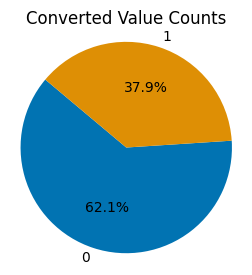

In [214]:
counts = df['Converted'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('colorblind'))
plt.title('Converted Value Counts')
plt.axis('equal')
plt.show()

### Non Numeric Data Bivariate Analysis

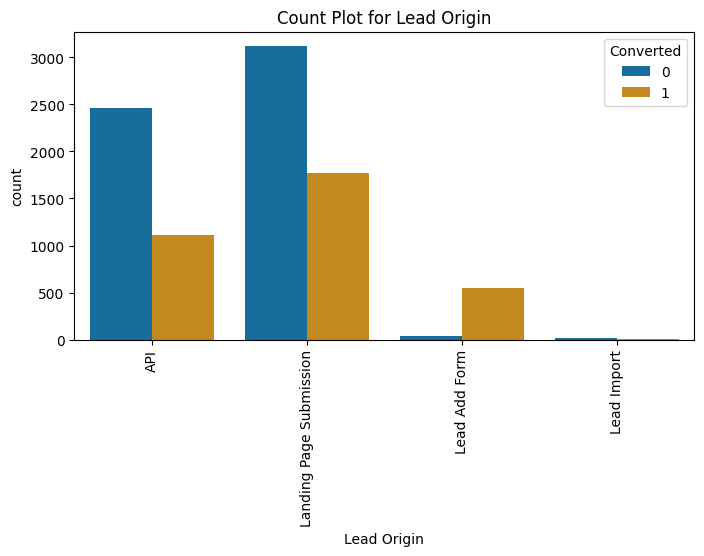

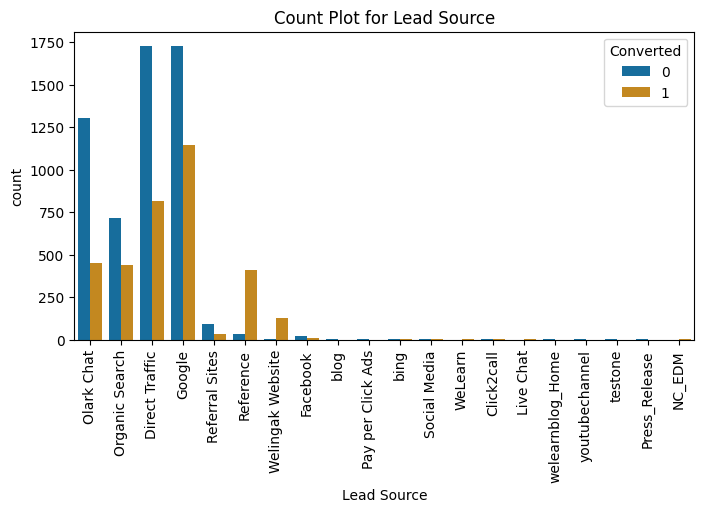

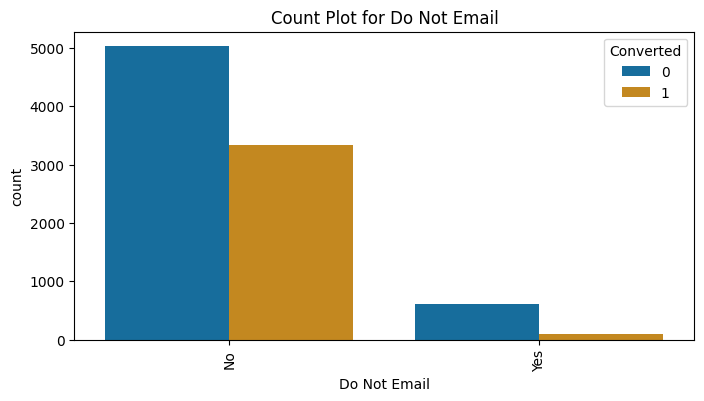

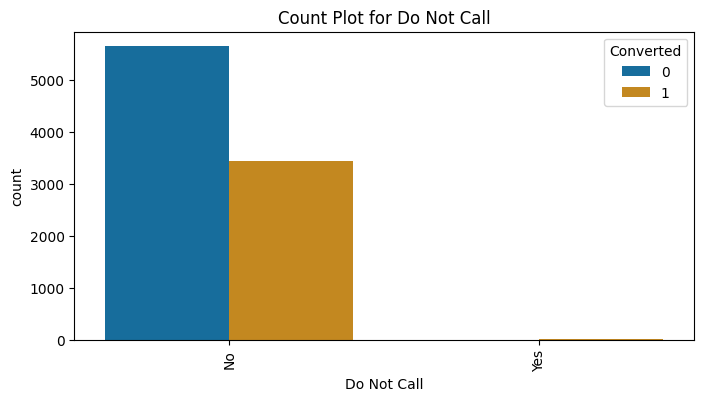

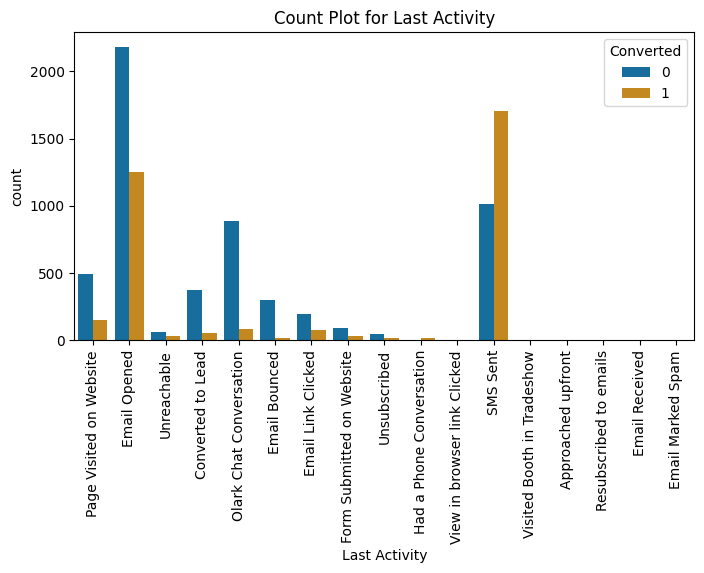

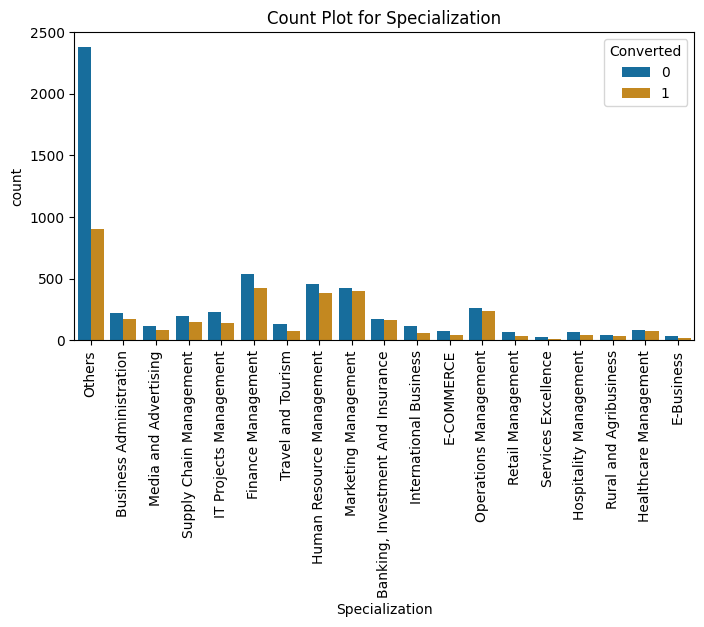

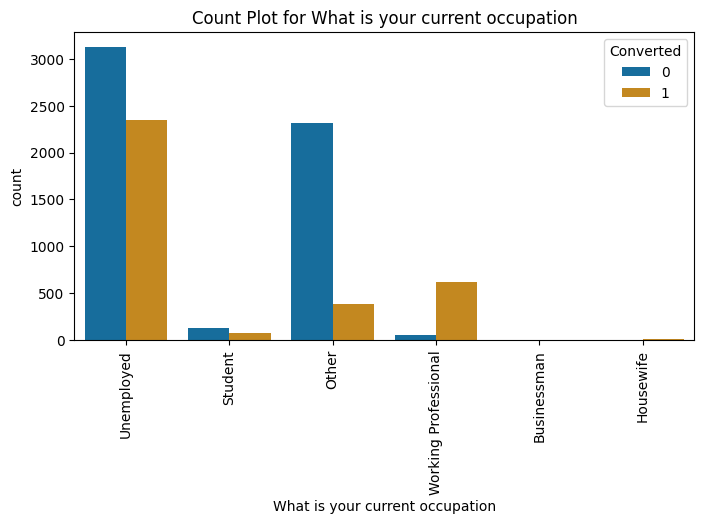

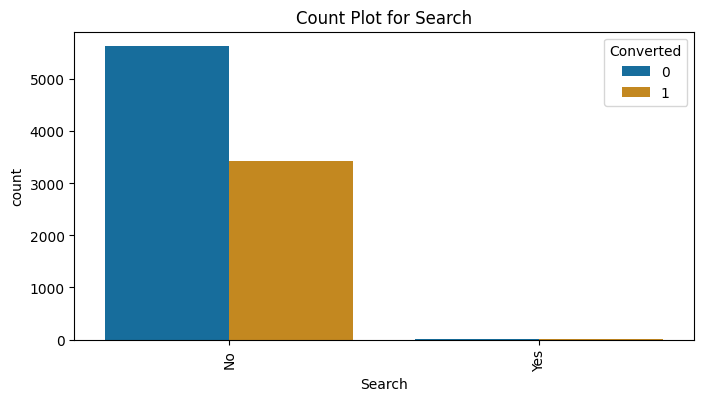

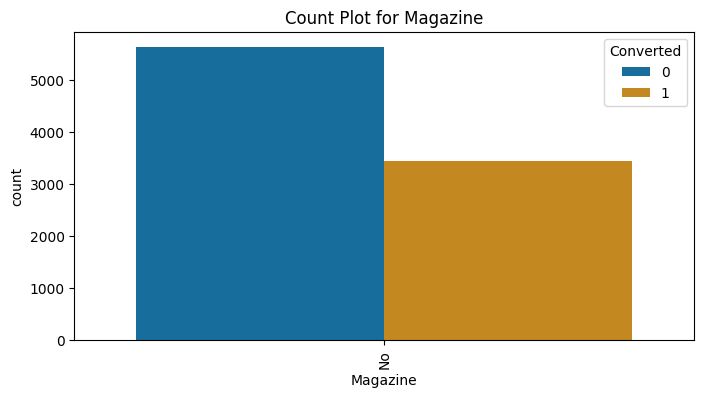

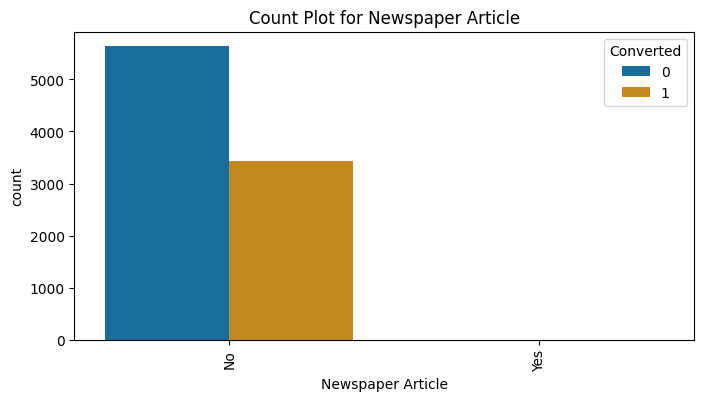

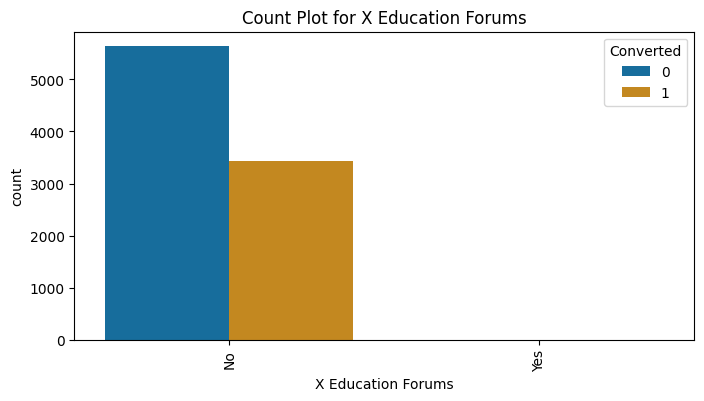

In [215]:
# Define a Funtion for the Bivariate analysis using Target Variable
def plot_count_with_hue(df, x_values):
    for x in x_values:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=x, hue="Converted", data=df, palette='colorblind')
        plt.xticks(rotation=90)
        plt.title(f'Count Plot for {x}')
        plt.show()

# Identify non-numeric columns
non_numeric_columns1 = [
    "Lead Origin", "Lead Source", "Do Not Email", "Do Not Call", "Last Activity", 
    "Specialization", "What is your current occupation", "Search", "Magazine", 
    "Newspaper Article", "X Education Forums"]

# Define x_values
x_values = non_numeric_columns1

# Plot
plot_count_with_hue(df, x_values)

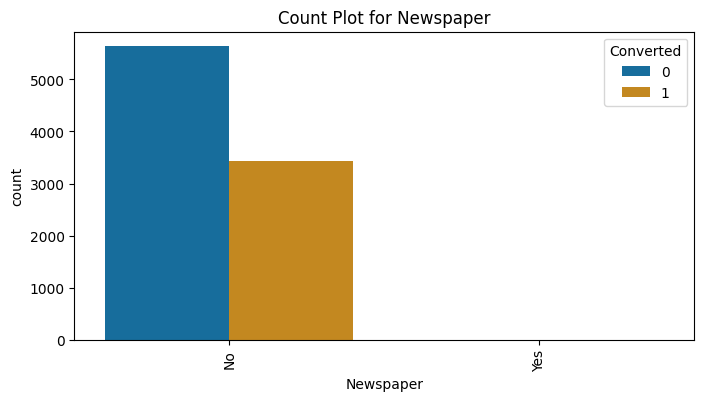

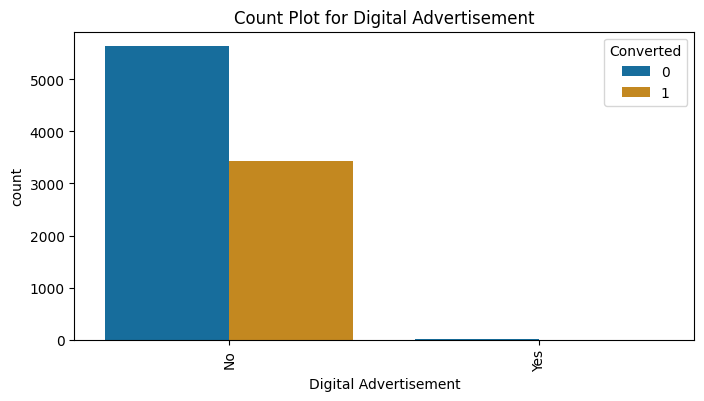

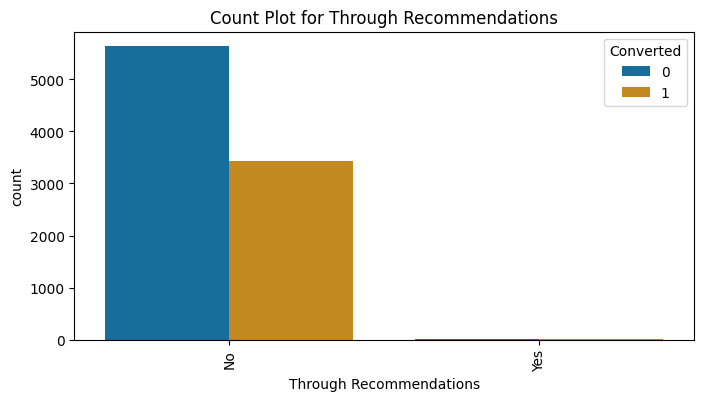

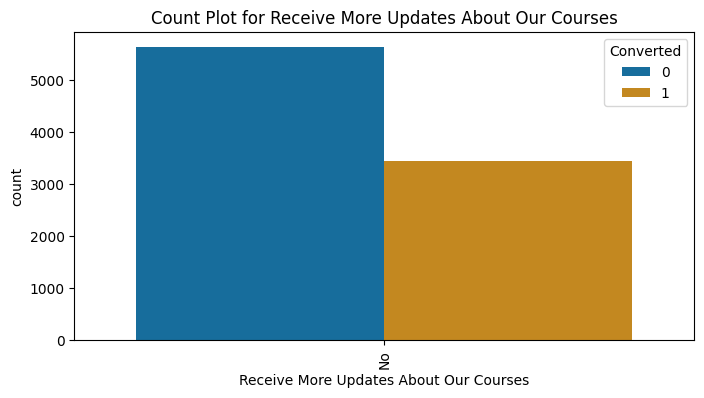

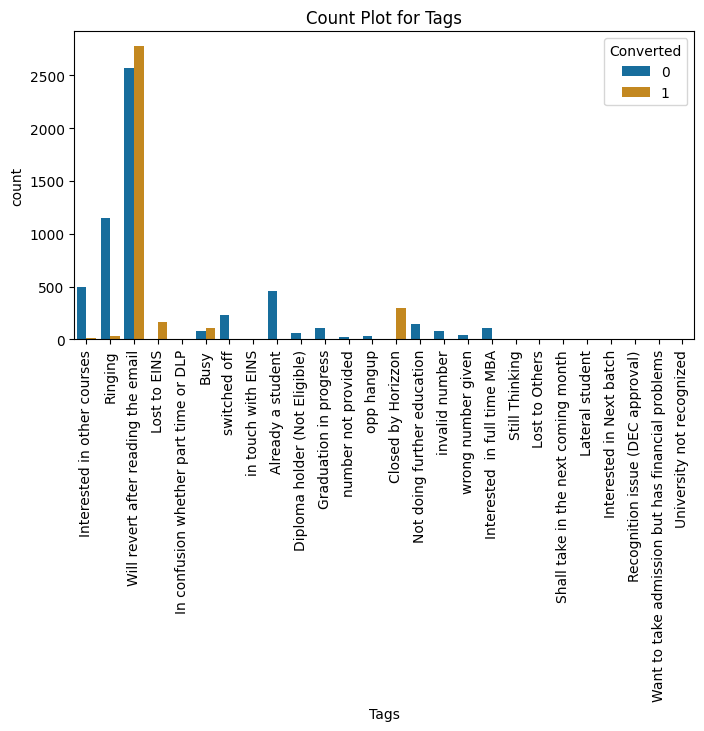

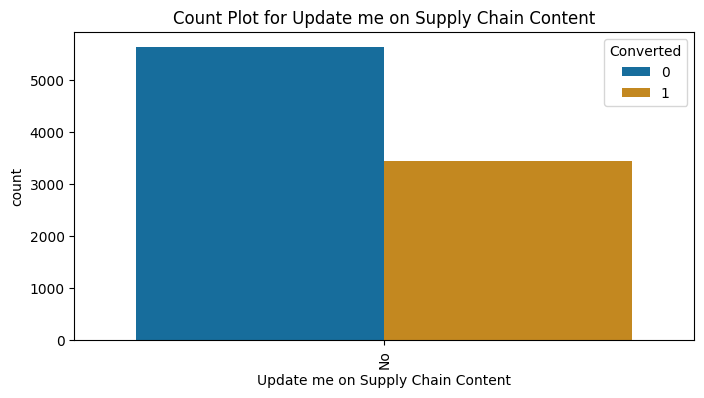

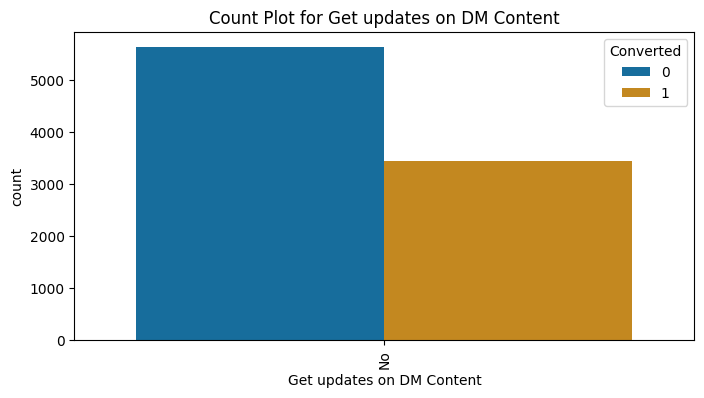

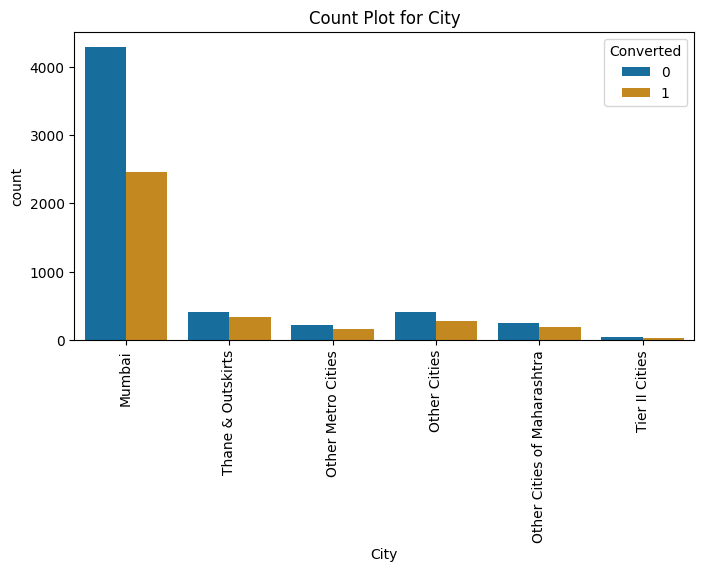

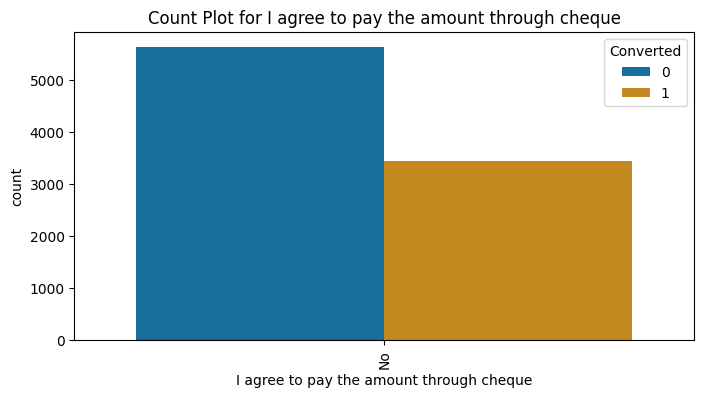

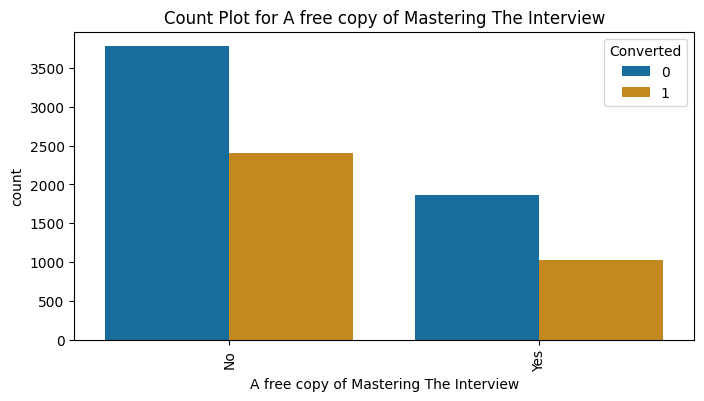

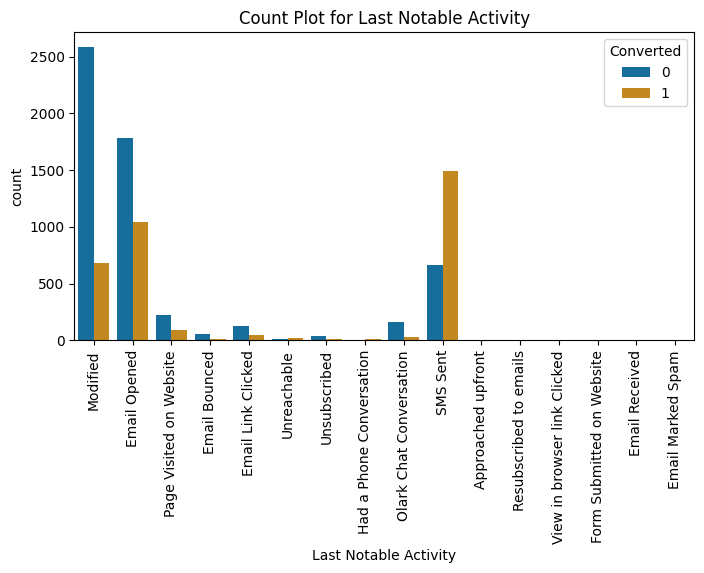

In [216]:


non_numeric_columns2 = ["Newspaper", "Digital Advertisement", 
    "Through Recommendations", "Receive More Updates About Our Courses", "Tags", 
    "Update me on Supply Chain Content", "Get updates on DM Content", "City", 
    "I agree to pay the amount through cheque", "A free copy of Mastering The Interview", 
    "Last Notable Activity"]

# Define x_values
x_values = non_numeric_columns2

#plot
plot_count_with_hue(df, x_values)

**Data Insight:**
>- API and Landing Page Submissions have 30-35% conversion rates with high lead counts. Lead Add Form boasts over 90% conversion but lower leads. Focus on boosting API/Landing Page rates and generating more Lead Add Form leads.
>- Improve conversions for Olark Chat, Organic Search, Direct Traffic, and Google leads. Generate more leads from Reference and Welingak Website.
>- SMS Sent has high conversion
>- Working Professionals going for the course have high chances of joining it.
>- Unemployed leads are the most in numbers but has around 30-35% conversion rate.

No Inference Columns, can be removed
>- Tags
>- Search
>- Magazine
>- Newspaper Article
>- X Education Forums 
>- Newspaper
>- Digital Advertisement
>- Through Recommendations
>- Receive More Updates About Our Courses
>- Update me on Supply Chain Content
>- Get updates on DM Content
>- I agree to pay the amount through cheque
>- A free copy of Mastering The Interview

In [217]:
# Removing above columns
df = df.drop(['Tags', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
              'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
              'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
              'Get updates on DM Content', 'I agree to pay the amount through cheque', 
              'A free copy of Mastering The Interview'], axis=1)

### Numeric Data Analysis

<Axes: ylabel='TotalVisits'>

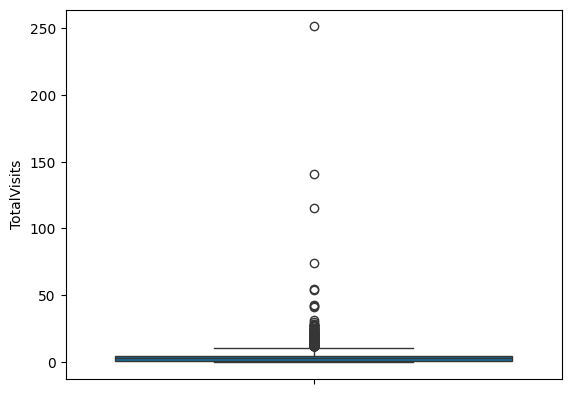

In [218]:
sns.boxplot(df['TotalVisits'],orient='vert',palette='colorblind')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

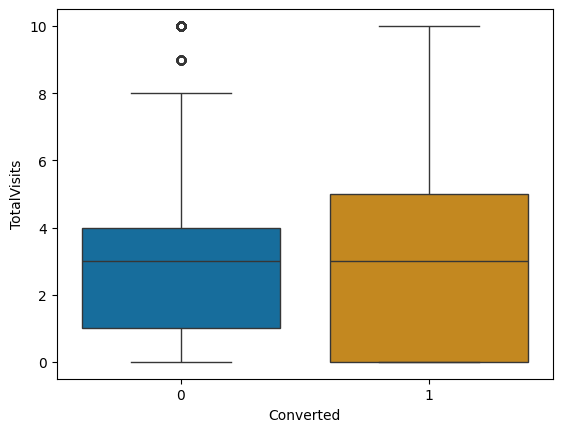

In [219]:
# Lead Origin BiVariate Analysis
percentiles = df['TotalVisits'].quantile([0.05, 0.95])
df['TotalVisits'] = df['TotalVisits'].clip(percentiles.iloc[0], percentiles.iloc[1])
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df,palette='colorblind')

Not much helpful

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

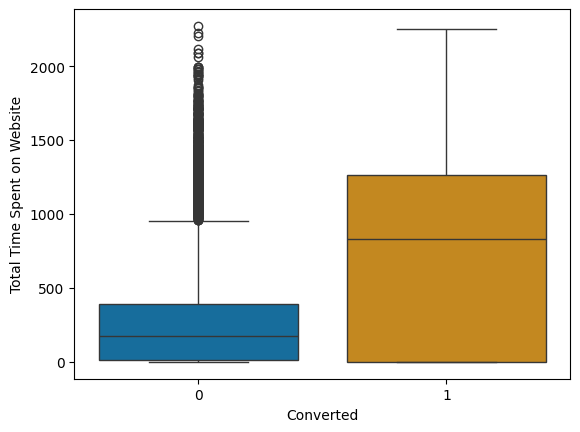

In [220]:
# Total Time spent on Website BiVariate Analysis
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,palette='colorblind')

**Data Insight** Leads converted more when spending more time on website. Make site engaging to boost conversions.

<Axes: ylabel='TotalVisits'>

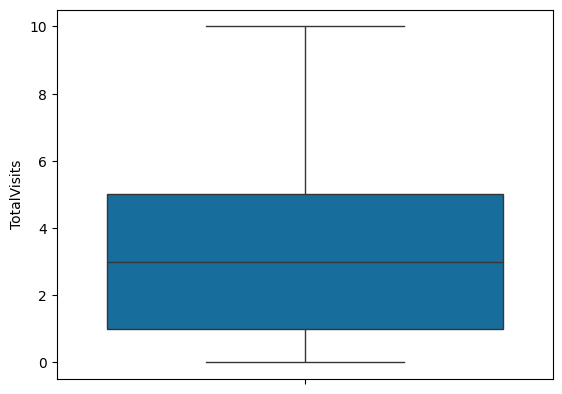

In [221]:
sns.boxplot(df['TotalVisits'],orient='vert',palette='colorblind')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

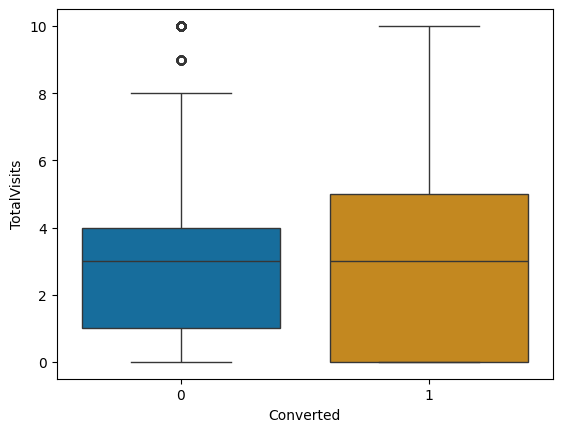

In [222]:
#Total Time spent on Website BiVariate Analysis
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df,palette='colorblind')

No conclusion

<Axes: xlabel='Converted', ylabel='Lead Number'>

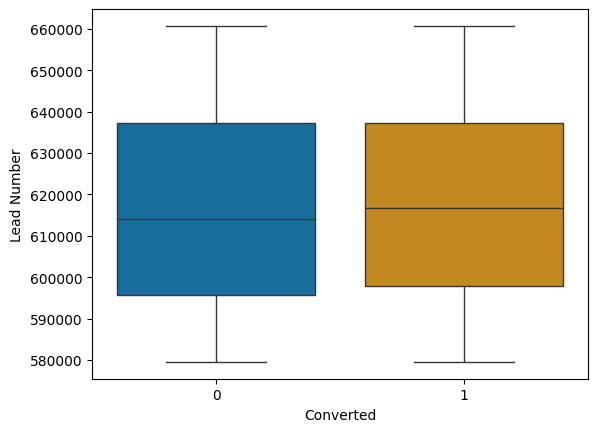

In [223]:
#Total Time spent on Website BiVariate Analysis
sns.boxplot(y = 'Lead Number', x = 'Converted', data = df,palette='colorblind')

column defining lead Number id(Can be removed)

In [224]:
df = df.drop('Lead Number', axis=1)

<Axes: ylabel='Page Views Per Visit'>

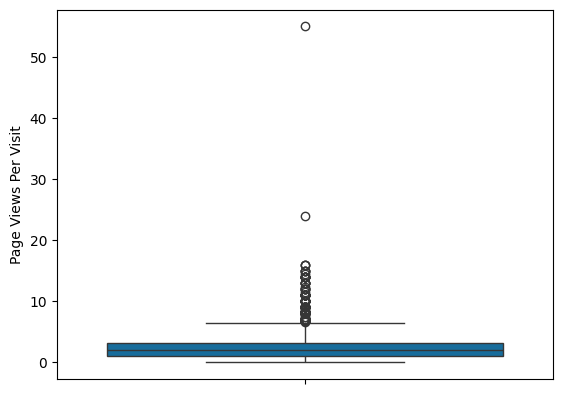

In [225]:
sns.boxplot(df['Page Views Per Visit'],orient='vert',palette='colorblind')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

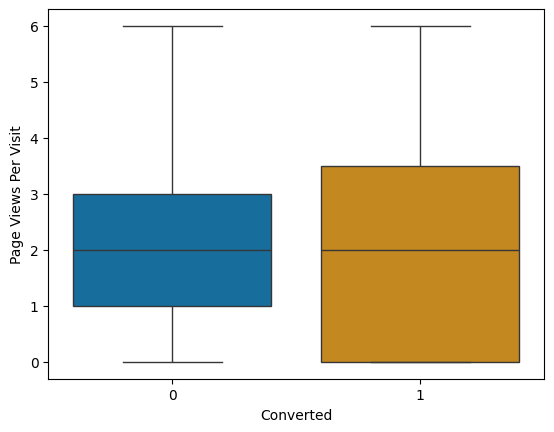

In [226]:
percentiles = df['Page Views Per Visit'].quantile([0.05, 0.95])
df['Page Views Per Visit'] = df['Page Views Per Visit'].clip(percentiles.iloc[0], percentiles.iloc[1])
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df,palette='colorblind')

Median for converted and unconverted leads is the same

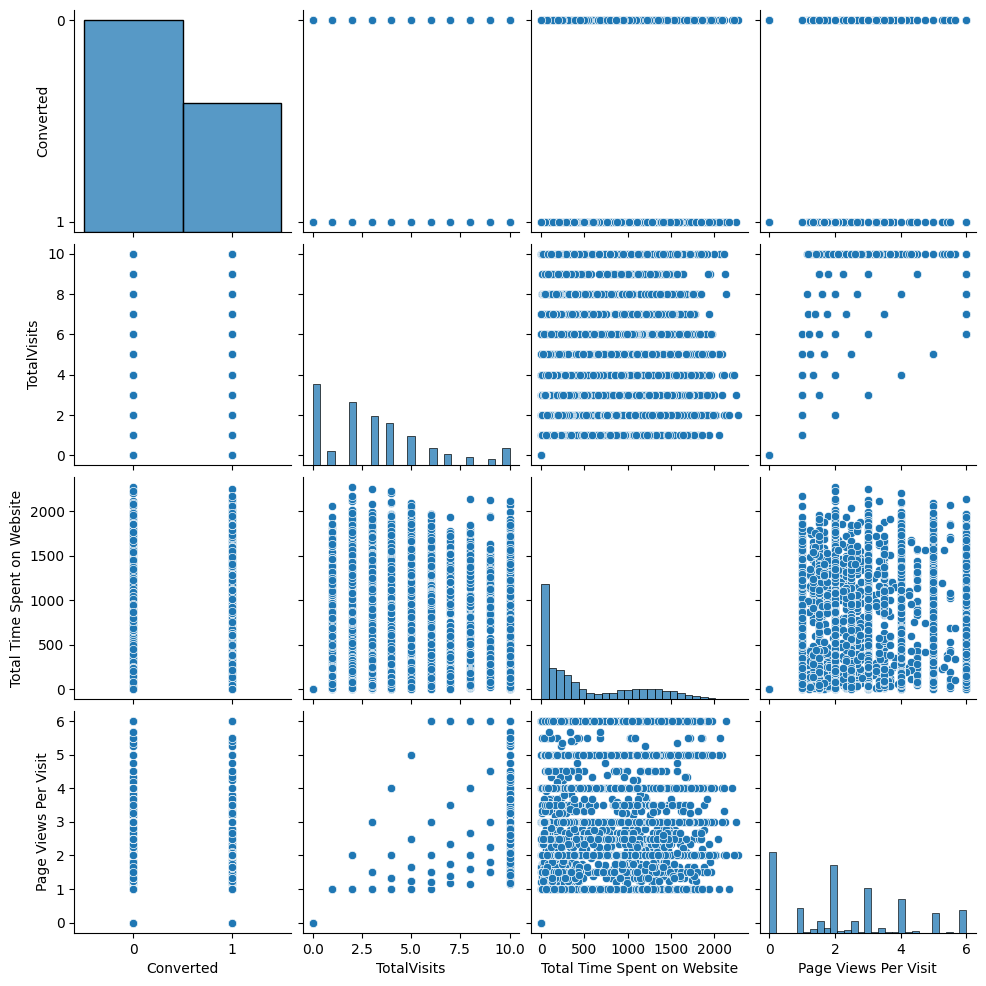

In [227]:
# visualize continuous variables
sns.pairplot(df, vars= ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

<Axes: >

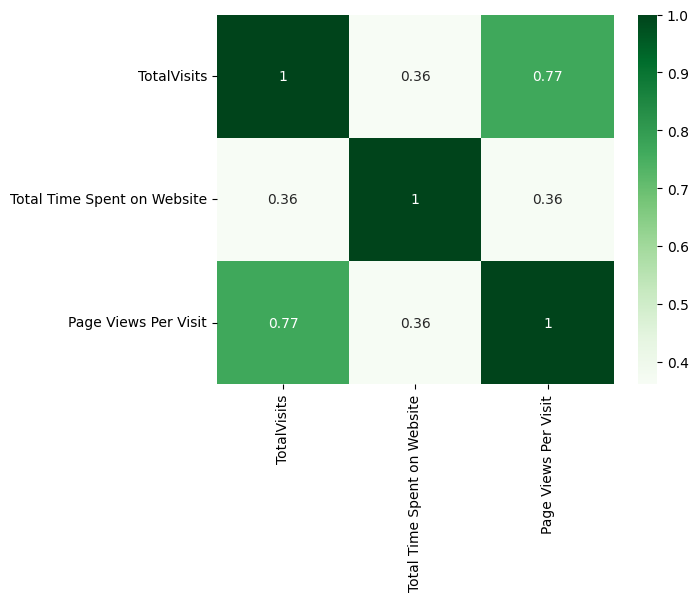

In [228]:
# checking correlation for all numeric variable
df_num= df.select_dtypes(include=['int', 'float'])
sns.heatmap(df_num.corr(),cmap="Greens",annot=True)

* Correlation seen between Converted and total time spent on website
* Also Total visit has high correlation with page views per visit

In [229]:
print("Shape of the data frame = {}".format(df.shape))

Shape of the data frame = (9074, 14)


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   object 
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

### Data Preparation

**Covert to Binary data**

In [231]:
# Converting some binary variables (Yes/No) to 1/0
df['Do Not Email'] = df['Do Not Email'].map({'Yes': 1, 'No': 0})
df['Do Not Call'] = df['Do Not Call'].map({'Yes': 1, 'No': 0})

In [232]:
df['Converted'] = pd.to_numeric(df['Converted'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

**Create Dummy data**

In [233]:
# List of columns to be converted into dummy variables
cols_to_dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 
                 'What is your current occupation', 'City', 'Last Notable Activity']

# Concatenate the original DataFrame with the dummy variables DataFrame
df = pd.concat([df, pd.get_dummies(df[cols_to_dummy], drop_first=True, dtype =int)], axis=1)

# Drop the original columns that have been converted to dummy variables
df = df.drop(cols_to_dummy, axis=1)

df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


**Splitting the data into train and test set**

In [234]:
# Feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [235]:
# Target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [236]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print("Shape of the train data frame =", X_train.shape)
print("Shape of the test data frame =", X_test.shape)

Shape of the train data frame = (6351, 86)
Shape of the test data frame = (2723, 86)


In [237]:
# scale continuous variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.178347,0.333333,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.085355,0.333333,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.619946,0.333333,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,0.711590,0.416667,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [238]:
# Calculate the conversion rate
conversion_rate = (df['Converted'].sum() / len(df['Converted'])) * 100
print(f'Conversion Rate: {conversion_rate:.2f}%')

Conversion Rate: 37.86%


In [239]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize and fit RFE with the logistic regression model and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=20).fit(X_train, y_train)

# Viewing columns selected by RFE
selected_columns = X_train.columns[rfe.support_]
print("Selected Columns:", selected_columns)

# Display support and ranking of all columns
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))


Selected Columns: Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')
[('Do Not Email', np.True_, np.int64(1)), ('Do Not Call', np.False_, np.int64(27)), ('TotalVisits', np.True_, np.int64(1)), ('Total Time Spent on Website', np.True_, np.int64(1)), ('Page Views Per Visit', n

### Model Building

**Model#1**

In [240]:
# Convert the categorical data in Numeric data
X_train[selected_columns] = X_train[selected_columns].astype(float)

#Convert Bool data to int
bool_cols = X_train[selected_columns].select_dtypes(include=['bool']).columns
X#_train[bool_cols] = X_train[bool_cols].astype(int)


print(X_train[selected_columns].dtypes)

# Add constant
X_train_sm = sm.add_constant(X_train[selected_columns])

Do Not Email                                            float64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                     float64
Lead Origin_Lead Add Form                               float64
Lead Source_Olark Chat                                  float64
Lead Source_Reference                                   float64
Lead Source_Welingak Website                            float64
Last Activity_Converted to Lead                         float64
Last Activity_Had a Phone Conversation                  float64
Last Activity_Olark Chat Conversation                   float64
Last Activity_SMS Sent                                  float64
Specialization_Others                                   float64
What is your current occupation_Housewife               float64
What is your current occupation_Other   

In [241]:
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.5
Date:                Mon, 21 Oct 2024   Deviance:                       4991.0
Time:                        12:36:18   Pearson chi2:                 6.17e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4214
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Model#2**

In [242]:
#define funtion to check GLM after removing comun
def fit_glm_with_drop(y_train, X_train, selected_columns, drop_column):
    # Drop the specified column from the original list
    if drop_column in selected_columns:
        selected_columns = selected_columns.drop(drop_column)
    
    # Add constant
    X_train_sm = sm.add_constant(X_train[selected_columns])

    # Fit the GLM model
    logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    result = logm.fit()

    # Print the model summary
    print(result.summary())

    return selected_columns  # Return the updated list of columns

# drop the column 'What is your current occupation_Housewife' since Pvalue is very high
selected_columns = fit_glm_with_drop(y_train, X_train, selected_columns, 'What is your current occupation_Housewife')


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.2
Date:                Mon, 21 Oct 2024   Deviance:                       4998.4
Time:                        12:36:18   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4208
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Model#3**

In [243]:
# drop the column 'Last Notable Activity_Had a Phone Conversation' since Pvalue is very high
selected_columns = fit_glm_with_drop(y_train, X_train, selected_columns, 'Last Notable Activity_Had a Phone Conversation')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.7
Date:                Mon, 21 Oct 2024   Deviance:                       4999.3
Time:                        12:36:19   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4207
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Model#4**

In [244]:
# drop the column 'Last Notable Activity_Had a Phone Conversation' since Pvalue is very high
selected_columns = fit_glm_with_drop(y_train, X_train, selected_columns, 'Lead Origin_Lead Add Form')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.7
Date:                Mon, 21 Oct 2024   Deviance:                       5001.4
Time:                        12:36:19   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4205
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Model#5**

In [245]:
def checkVif(selected_columns):
    df1 = X_train[selected_columns]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

checkVif(selected_columns)

                                             Features   VIF
3                                Page Views Per Visit  7.65
1                                         TotalVisits  5.76
4                 Lead Origin_Landing Page Submission  4.15
12                              Specialization_Others  2.90
2                         Total Time Spent on Website  2.17
5                              Lead Source_Olark Chat  2.16
15                     Last Notable Activity_Modified  2.04
10              Last Activity_Olark Chat Conversation  1.65
13              What is your current occupation_Other  1.63
11                             Last Activity_SMS Sent  1.63
8                     Last Activity_Converted to Lead  1.27
14  What is your current occupation_Working Profes...  1.22
6                               Lead Source_Reference  1.20
0                                        Do Not Email  1.15
7                        Lead Source_Welingak Website  1.11
9              Last Activity_Had a Phone

**Model#6**

In [246]:
# drop the column 'TotalVisits' since Vif is very high
selected_columns = fit_glm_with_drop(y_train, X_train, selected_columns, 'TotalVisits')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2511.1
Date:                Mon, 21 Oct 2024   Deviance:                       5022.2
Time:                        12:36:19   Pearson chi2:                 6.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4186
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [247]:
checkVif(selected_columns)

                                             Features   VIF
2                                Page Views Per Visit  4.18
3                 Lead Origin_Landing Page Submission  4.10
11                              Specialization_Others  2.87
4                              Lead Source_Olark Chat  2.15
1                         Total Time Spent on Website  2.13
14                     Last Notable Activity_Modified  2.04
9               Last Activity_Olark Chat Conversation  1.65
10                             Last Activity_SMS Sent  1.63
12              What is your current occupation_Other  1.63
7                     Last Activity_Converted to Lead  1.26
13  What is your current occupation_Working Profes...  1.22
5                               Lead Source_Reference  1.20
0                                        Do Not Email  1.15
6                        Lead Source_Welingak Website  1.11
8              Last Activity_Had a Phone Conversation  1.01
15                  Last Notable Activit

**Model#7**

In [248]:
# drop the column 'Page Views Per Visit' since Pvalue is very high
selected_columns = fit_glm_with_drop(y_train, X_train, selected_columns, 'Page Views Per Visit')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.3
Date:                Mon, 21 Oct 2024   Deviance:                       5028.6
Time:                        12:36:19   Pearson chi2:                 6.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4180
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [249]:
checkVif(selected_columns)

                                             Features   VIF
10                              Specialization_Others  2.54
2                 Lead Origin_Landing Page Submission  2.43
13                     Last Notable Activity_Modified  2.03
1                         Total Time Spent on Website  1.99
3                              Lead Source_Olark Chat  1.98
8               Last Activity_Olark Chat Conversation  1.65
11              What is your current occupation_Other  1.62
9                              Last Activity_SMS Sent  1.61
6                     Last Activity_Converted to Lead  1.24
12  What is your current occupation_Working Profes...  1.21
4                               Lead Source_Reference  1.18
0                                        Do Not Email  1.15
5                        Lead Source_Welingak Website  1.09
7              Last Activity_Had a Phone Conversation  1.01
14                  Last Notable Activity_Unreachable  1.01


**Model#8**

In [250]:
# drop the column 'Last Activity_Converted to Lead' since Pvalue is high
selected_columns = fit_glm_with_drop(y_train, X_train, selected_columns, 'Last Activity_Converted to Lead')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.6
Date:                Mon, 21 Oct 2024   Deviance:                       5039.2
Time:                        12:36:19   Pearson chi2:                 6.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4170
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [251]:
checkVif(selected_columns)

                                             Features   VIF
9                               Specialization_Others  2.50
2                 Lead Origin_Landing Page Submission  2.41
1                         Total Time Spent on Website  1.99
3                              Lead Source_Olark Chat  1.96
12                     Last Notable Activity_Modified  1.80
10              What is your current occupation_Other  1.62
8                              Last Activity_SMS Sent  1.59
7               Last Activity_Olark Chat Conversation  1.59
11  What is your current occupation_Working Profes...  1.21
4                               Lead Source_Reference  1.18
0                                        Do Not Email  1.13
5                        Lead Source_Welingak Website  1.09
6              Last Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01


Model#8 is final with 13 variables. All P-values are 0 and VIF values are low, confirming its robustness.

In [252]:
X_train_sm = sm.add_constant(X_train[selected_columns])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm.fit()

In [253]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.088899
1012    0.147658
9226    0.444859
4750    0.719060
7987    0.846373
1281    0.780964
2880    0.041924
4971    0.968753
7536    0.884764
1248    0.821847
dtype: float64

In [254]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08889862, 0.14765774, 0.44485902, 0.71906048, 0.84637334,
       0.78096363, 0.04192427, 0.96875277, 0.88476355, 0.82184742])

**Making predictions and evaluating your model**

In [255]:
# Convert y_train predictions to a DataFrame
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

# Add predicted column based on probability threshold
y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Calculate confusion matrix and extract TP, TN, FP, FN
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
TN, FP, FN, TP = confusion.ravel()

# Calculate accuracy
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

# Create a dictionary to store metrics
metrics_dict = {
    "Confusion Matrix": confusion,
    "Sensitivity": TP / (TP + FN),
    "Specificity": TN / (TN + FP),
    "False Positive Rate": FP / (TN + FP),
    "Positive Predictive Value": TP / (TP + FP),
    "Accuracy": accuracy
}

# Print the metrics
for key, value in metrics_dict.items():
    print(f"{key}: {value}")


Confusion Matrix: [[3467  438]
 [ 724 1722]]
Sensitivity: 0.7040065412919051
Specificity: 0.8878361075544174
False Positive Rate: 0.11216389244558259
Positive Predictive Value: 0.7972222222222223
Accuracy: 0.8170366871358841


**ROC Curve:** Plot the ROC curve and calculate the AUC to assess your model's performance.

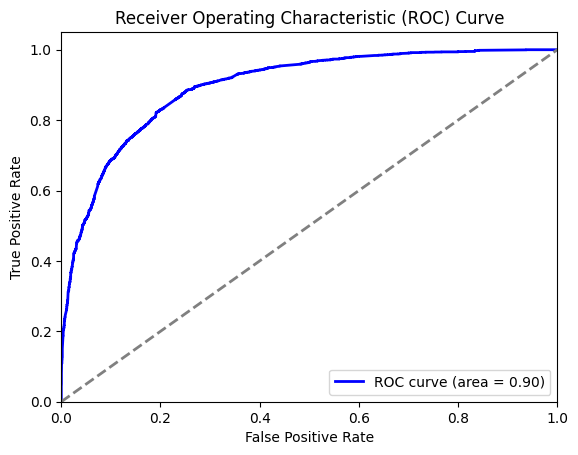

In [256]:
# ROC curve and AUC
y_train_pred_prob = y_train_pred_final['Converted_prob']
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_prob)
roc_auc = metrics.roc_auc_score(y_train, y_train_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Threshold Tuning:** Experiment with different probability thresholds to find the best balance between sensitivity and specificity

Intersection Threshold: 0.37
Accuracy at Intersection: 0.8110533774208786
Sensitivity at Intersection: 0.8045789043336059
Specificity at Intersection: 0.8151088348271447


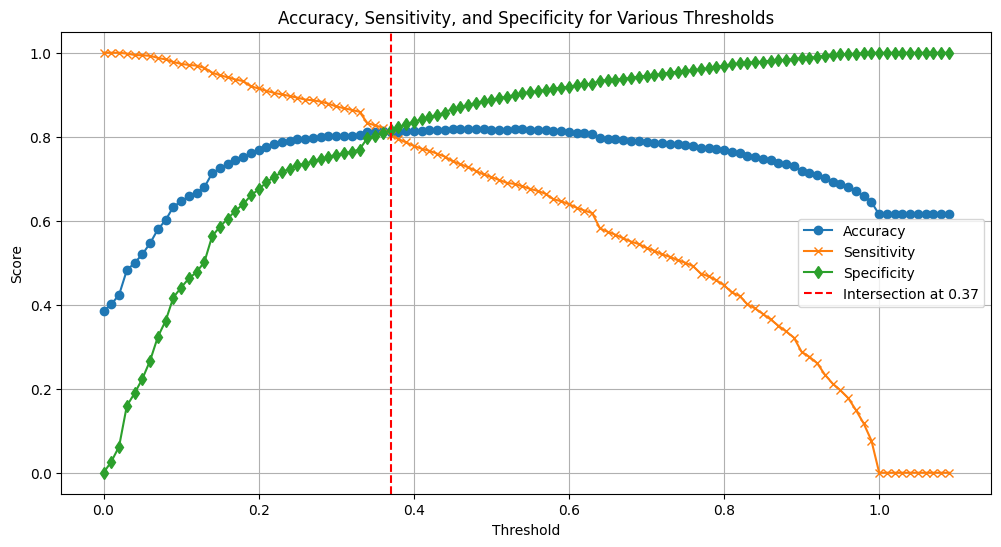

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the range of thresholds
thresholds = np.arange(0.0, 1.1, 0.01)

# Lists to store the results
accuracies = []
sensitivities = []
specificities = []

for threshold in thresholds:
    # Predict based on the threshold
    y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    # Calculate confusion matrix
    confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
    TN, FP, FN, TP = confusion.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Store the results
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Find the intersection point
abs_diff = np.abs(np.array(sensitivities) - np.array(specificities))
intersection_idx = np.argmin(abs_diff)
intersection_threshold = thresholds[intersection_idx]
intersection_accuracy = accuracies[intersection_idx]
intersection_sensitivity = sensitivities[intersection_idx]
intersection_specificity = specificities[intersection_idx]

print(f"Intersection Threshold: {intersection_threshold}")
print(f"Accuracy at Intersection: {intersection_accuracy}")
print(f"Sensitivity at Intersection: {intersection_sensitivity}")
print(f"Specificity at Intersection: {intersection_specificity}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.plot(thresholds, sensitivities, label='Sensitivity', marker='x')
plt.plot(thresholds, specificities, label='Specificity', marker='d')
plt.axvline(x=intersection_threshold, color='red', linestyle='--', label=f'Intersection at {intersection_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, and Specificity for Various Thresholds')
plt.legend()
plt.grid(True)
plt.show()

### Precision and Recall View

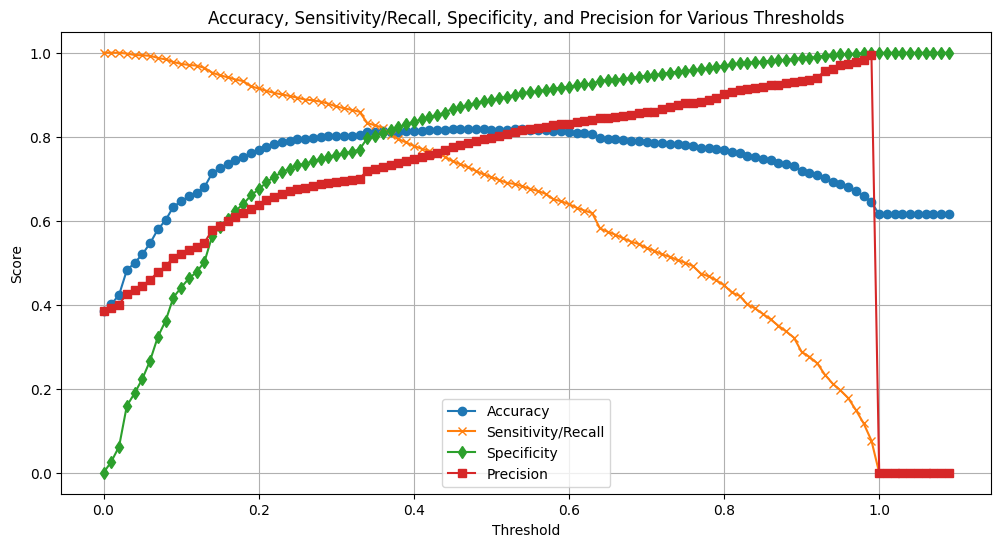

In [258]:
# Define the range of thresholds
thresholds = np.arange(0.0, 1.1, 0.01)

# Lists to store the results
accuracies = []
sensitivities = []
specificities = []
precisions = []
recalls = []

for threshold in thresholds:
    # Predict based on the threshold
    y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    # Calculate confusion matrix
    confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
    TN, FP, FN, TP = confusion.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
    sensitivity = TP / (TP + FN)  # Same as recall
    specificity = TN / (TN + FP)
    precision = precision_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
    recall = recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
    
    # Store the results
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    precisions.append(precision)
    recalls.append(recall)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.plot(thresholds, sensitivities, label='Sensitivity/Recall', marker='x')
plt.plot(thresholds, specificities, label='Specificity', marker='d')
plt.plot(thresholds, precisions, label='Precision', marker='s')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity/Recall, Specificity, and Precision for Various Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [259]:
bool_cols = X_test.select_dtypes(include=['bool']).columns

X_test[bool_cols] = X_test[bool_cols].astype(int)

X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Ensure test data preprocessing
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test = X_test[selected_columns]

# Ensure all columns are numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Adding a constant to the test set
X_test_sm = sm.add_constant(X_test)


# Check the dtypes
print(X_test_sm.dtypes)



const                                                   float64
Do Not Email                                              int64
Total Time Spent on Website                             float64
Lead Origin_Landing Page Submission                       int64
Lead Source_Olark Chat                                    int64
Lead Source_Reference                                     int64
Lead Source_Welingak Website                              int64
Last Activity_Had a Phone Conversation                    int64
Last Activity_Olark Chat Conversation                     int64
Last Activity_SMS Sent                                    int64
Specialization_Others                                     int64
What is your current occupation_Other                     int64
What is your current occupation_Working Professional      int64
Last Notable Activity_Modified                            int64
Last Notable Activity_Unreachable                         int64
dtype: object


### Making Predictions on the Test Set

In [260]:

# Making predictions on the test set
y_test_pred_prob = result.predict(X_test_sm)

y_pred_1 = pd.DataFrame(y_test_pred_prob, columns=['Converted_prob'])
y_test_df = pd.DataFrame(y_test)

# Adding Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both DataFrames to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Converted_prob'])

# Applying the threshold
optimal_threshold = 0.37
y_pred_final['final_predicted'] = y_pred_final['Converted_prob'].map(lambda x: 1 if x > optimal_threshold else 0)

# Display the result
print(y_pred_final.head())


   Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.060951                0
1         1490          1        0.969482                1
2         7936          0        0.051949                0
3         4216          1        0.802158                1
4         3830          0        0.057185                0


In [261]:
# Making predictions on the test set
y_test_pred_prob = result.predict(X_test_sm)

# Applying the threshold
optimal_threshold = 0.37  # Replace with your identified threshold
y_test_pred = y_test_pred_prob.apply(lambda x: 1 if x >= optimal_threshold else 0)

# Calculate confusion matrix and extract TP, TN, FP, FN
confusion = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = confusion.ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)  # Same as recall
specificity = TN / (TN + FP)

# Print the evaluation metrics
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Confusion Matrix:
 [[1421  313]
 [ 207  782]]
Accuracy: 0.8090341535071612
Sensitivity (Recall): 0.7906976744186046
Specificity: 0.8194925028835064


In [262]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.060951,0,6
1,1490,1,0.969482,1,97
2,7936,0,0.051949,0,5
3,4216,1,0.802158,1,80
4,3830,0,0.057185,0,6


In [263]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969482,1,97
8,4223,1,0.921812,1,92
16,1946,1,0.937471,1,94
21,2461,1,0.992187,1,99
23,5822,1,0.997038,1,100
...,...,...,...,...,...
2686,8052,1,0.997038,1,100
2694,1566,1,0.948016,1,95
2699,6461,1,0.964757,1,96
2715,6299,1,0.902621,1,90


In [264]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 7347, 2504, 7674, 8596, 4963,  446,  789,
       8372, 5805, 3758,  337, 1561, 5367,  737, 9034, 2176, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 6532,  999, 5797, 8687,  831, 7653, 2018,  243, 6743, 3307,
       3976, 5769, 1051, 1663, 6598, 3288, 6557, 8959, 7521, 8282, 8213,
       9063, 5292, 6913, 1481,  785, 2985, 3265, 3285, 7433, 3384, 3858,
       3810, 2009, 8106,  373, 3055, 7417, 4179, 4994, 8568, 7268, 4353,
       6784, 6754, 7236, 5725, 2960, 7753, 3983,  802,  358, 8745, 4717,
        505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 3827,
       7175, 1675, 6999, 5932, 5826, 8492, 6499, 2481, 3439, 4612, 7468,
       7129, 4793, 1557, 4837, 2495,  822, 1030, 8111, 2378, 5090, 5075,
       7699, 5638, 2342, 8077, 2727, 7489, 2961, 1542, 5656, 2630, 6728,
       8205, 6332, 8461, 2427, 5087,  174, 2674, 80

In [268]:
top_feature = result.params.sort_values(ascending=False)
top_feature

Lead Source_Welingak Website                            5.498577
Total Time Spent on Website                             4.542084
Lead Source_Reference                                   3.121674
Last Activity_Had a Phone Conversation                  2.706940
What is your current occupation_Working Professional    2.368930
Last Notable Activity_Unreachable                       1.762210
Last Activity_SMS Sent                                  1.261183
Lead Source_Olark Chat                                  1.222124
Last Notable Activity_Modified                         -0.789137
Last Activity_Olark Chat Conversation                  -0.928425
const                                                  -0.932698
Specialization_Others                                  -0.982936
Lead Origin_Landing Page Submission                    -1.065016
What is your current occupation_Other                  -1.139510
Do Not Email                                           -1.529060
dtype: float64

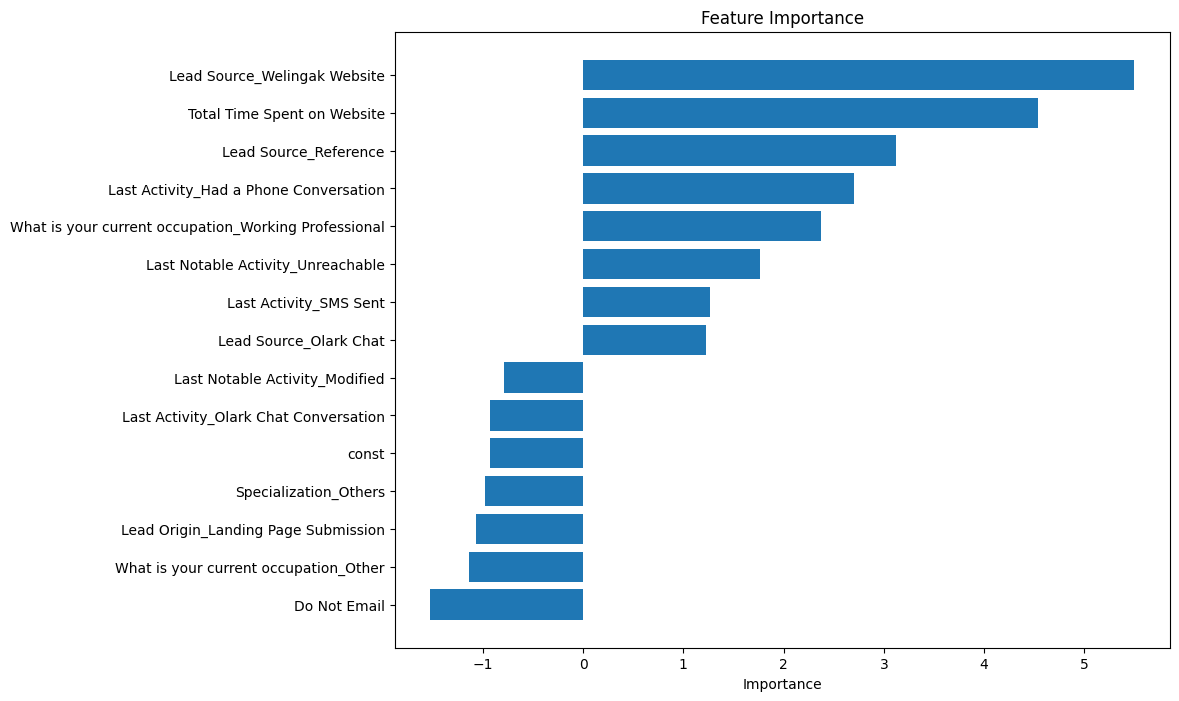

In [267]:
# Sort the features for plotting
top_feature_sort = np.argsort(top_feature.values)
pos = np.arange(top_feature_sort.shape[0]) + 0.5

# Create subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Bar plot for feature importances
ax.barh(pos, top_feature.values[top_feature_sort], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(top_feature.index[top_feature_sort])
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')

plt.show()


### Recommendations based on Prediction

**Call Priority Leads:**

>- Leads from "Welingak Websites" and "Reference" sources are highly likely to convert.

>- Working professionals show a higher conversion likelihood.

>- Leads who spend more time on the website are promising candidates.

>-  Leads from "Olark Chat" are more likely to convert.

>-  Leads whose last activity was SMS Sent are promising.

>-  Leads having Phone conversion are promising candidates.

**Avoid Calling:**

>- Leads whose last activity was "Olark Chat Conversation" are less likely to convert.

>- Leads from "Landing Page Submission" origin are not likely candidates.

>- Leads with "Specialization: Others" show lower conversion rates.

>- Leads who selected "Do not Email" as "yes" are less likely to convert.